<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/Pytorch_Frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#

In [ ]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms

In [ ]:
# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

# Dataset Part

In [ ]:
transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
type(training_set)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
training_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
validation_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2) # 每个 batch 里有 4 个数据
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

In [ ]:
training_loader

In [ ]:
# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img = img.mean(dim=0)
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  if one_channel:
    plt.imshow(npimg, cmap="Greys")
  else:
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
print('images.shape : ', images.shape)
print('labels : ', labels)

images.shape :  torch.Size([4, 1, 28, 28])
labels :  tensor([7, 8, 5, 5])


In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()

Coat  Dress  Sandal  Shirt
images.shape :  torch.Size([4, 1, 28, 28])
images[0].shape :  torch.Size([1, 28, 28])
images[1].shape :  torch.Size([1, 28, 28])
images[2].shape :  torch.Size([1, 28, 28])
images[3].shape :  torch.Size([1, 28, 28])
img_grid.shape :  torch.Size([3, 32, 122])


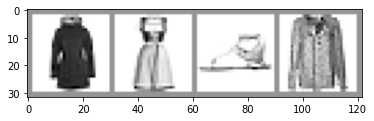

In [ ]:
# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))
print('images.shape : ', images.shape)
print('images[0].shape : ', images[0].shape)
print('images[1].shape : ', images[1].shape)
print('images[2].shape : ', images[2].shape)
print('images[3].shape : ', images[3].shape)
print('img_grid.shape : ', img_grid.shape)

In [ ]:
print('images.shape : ', images.shape)
print('(torchvision.utils.make_grid(images)).shape : ', (torchvision.utils.make_grid(images)).shape)
print('labels : ', labels)
print('labels[0] : ', labels[0])
print('labels[1] : ', labels[1])
print('labels[2] : ', labels[2])
print('labels[3] : ', labels[3])

images.shape :  torch.Size([4, 1, 28, 28])
(torchvision.utils.make_grid(images)).shape :  torch.Size([3, 32, 122])
labels :  tensor([4, 3, 5, 6])
labels[0] :  tensor(4)
labels[1] :  tensor(3)
labels[2] :  tensor(5)
labels[3] :  tensor(6)


In [ ]:
gen = (classes[labels[j]] for j in range(4))
print(next(gen)) 
print(next(gen)) 
print(next(gen)) 
print(next(gen)) 
print()
print('  '.join(classes[labels[j]] for j in range(4)))

Coat
Dress
Sandal
Shirt

Coat  Dress  Sandal  Shirt


# The Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
  def __init__(self):
    super(GarmentClassifier, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = GarmentClassifier()

# Loss Function

For this example, we’ll be using a cross-entropy loss. For demonstration purposes, we’ll create batches of dummy output and label values, run them through the loss function, and examine the result.

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.4581, 0.5987, 0.3295, 0.7525, 0.3005, 0.1510, 0.9237, 0.8626, 0.6358,
         0.0345],
        [0.4487, 0.1613, 0.0142, 0.7148, 0.1102, 0.8881, 0.6149, 0.2625, 0.6682,
         0.5854],
        [0.0803, 0.5734, 0.1127, 0.4116, 0.1117, 0.2498, 0.0120, 0.5067, 0.2462,
         0.3132],
        [0.4874, 0.9999, 0.2112, 0.6236, 0.7130, 0.0186, 0.6508, 0.6331, 0.6031,
         0.7719]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.1476988792419434


# Optimizer

For this example, we’ll be using simple stochastic gradient descent with momentum.

In [ ]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# The Training Loop

Below, we have a function that performs one training epoch. It enumerates data from the DataLoader, and on each pass of the loop does the following:


*   Gets a batch of training data from the DataLoader
*   Zeros the optimizer’s gradients
*   Performs an inference - that is, gets predictions from the model for an input batch
*   Calculates the loss for that set of predictions vs. the labels on the dataset
*   Calculates the backward gradients over the learning weights
*   Tells the optimizer to perform one learning step - that is, adjust the model’s learning weights based on the observed gradients for this batch, according to the optimization algorithm we chose
*   It reports on the loss for every 1000 batches
*   Finally, it reports the average per-batch loss for the last 1000 batches, for comparison with a validation run

In [ ]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [ ]:
training_loader

In [ ]:
num = 0
for i, data in enumerate(training_loader):
  num += 1

print('batch number : ', num)
print('In one batch, there are 4 samples.')
print('Because training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)')

batch number :  15000
In one batch, there are 4 samples.
Because training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)


In [ ]:
training_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

# Per-Epoch Activity

There are a couple of things we’ll want to do once per epoch:

*   Perform validation by checking our relative loss on a set of data that was not used for training, and report this
*   Save a copy of the model

Here, we’ll do our reporting in TensorBoard. This will require going to the command line to start TensorBoard, and opening it in another browser tab.

In [ ]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))

In [ ]:
writer

In [ ]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    # We don't need gradients on to do reporting
    model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

To load a saved version of the model:

In [ ]:
saved_model = GarmentClassifier()
saved_model.load_state_dict(torch.load(PATH))

# My Own Code Test

In [ ]:
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import DataLoader

In [ ]:
train_data = torch.tensor([[1, 1, 1], 
                           [2, 2, 2], 
                           [3, 3, 3], 
                           [4, 4, 4], 
                           [5, 5, 5], 
                           [6, 6, 6], 
                           [7, 7, 7], 
                           [8, 8, 8], 
                           [9, 9, 9], 
                           [10, 10, 10], 
                           [11, 11, 11], 
                           [12, 12, 12]])
train_label = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print('train_data shape : ', train_data.shape)
print('train_label shape : ', train_label.shape)

train_data shape :  torch.Size([12, 3])
train_label shape :  torch.Size([12])


In [ ]:
train_ids = TensorDataset(train_data, train_label) # 封装数据 train_data 与标签 train_label

In [ ]:
train_ids

In [ ]:
# 切片输出
print('train_ids[0] : ', train_ids[0])
# 切片输出
print('train_ids[0:2] : ', train_ids[0:2])

train_ids[0] :  (tensor([1, 1, 1]), tensor(1))
train_ids[0:2] :  (tensor([[1, 1, 1],
        [2, 2, 2]]), tensor([1, 2]))


In [ ]:
# 循环取数据
i = 0
for x_train, y_label in train_ids:
  print('i : ', i)
  print('x_train : ', x_train)
  print('y_label : ', y_label, '\n')
  i += 1

i :  0
x_train :  tensor([1, 1, 1])
y_label :  tensor(1) 

i :  1
x_train :  tensor([2, 2, 2])
y_label :  tensor(2) 

i :  2
x_train :  tensor([3, 3, 3])
y_label :  tensor(3) 

i :  3
x_train :  tensor([4, 4, 4])
y_label :  tensor(4) 

i :  4
x_train :  tensor([5, 5, 5])
y_label :  tensor(5) 

i :  5
x_train :  tensor([6, 6, 6])
y_label :  tensor(6) 

i :  6
x_train :  tensor([7, 7, 7])
y_label :  tensor(7) 

i :  7
x_train :  tensor([8, 8, 8])
y_label :  tensor(8) 

i :  8
x_train :  tensor([9, 9, 9])
y_label :  tensor(9) 

i :  9
x_train :  tensor([10, 10, 10])
y_label :  tensor(10) 

i :  10
x_train :  tensor([11, 11, 11])
y_label :  tensor(11) 

i :  11
x_train :  tensor([12, 12, 12])
y_label :  tensor(12) 



In [ ]:
# DataLoader进行数据封装
train_loader = DataLoader(dataset=train_ids, batch_size=4, shuffle=False) # 每个 batch 里有 4 个 sample

In [ ]:
for i, one_batch in enumerate(train_loader):  # 注意enumerate返回值有两个,一个是序号，一个是数据（包含训练数据和标签）
  data, label = one_batch
  print('batch : ', i)
  print('data of one batch : ', data)
  print('labels of one batch : ', label, '\n', '\n')

batch :  0
data of one batch :  tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])
labels of one batch :  tensor([1, 2, 3, 4]) 
 

batch :  1
data of one batch :  tensor([[5, 5, 5],
        [6, 6, 6],
        [7, 7, 7],
        [8, 8, 8]])
labels of one batch :  tensor([5, 6, 7, 8]) 
 

batch :  2
data of one batch :  tensor([[ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11],
        [12, 12, 12]])
labels of one batch :  tensor([ 9, 10, 11, 12]) 
 



tensor([[1, 2, 3], 
        [7, 8, 9], 
        [4, 5, 6], 
        [7, 8, 9]]) 和 tensor([44, 66, 55, 66])是一个 batch 里的数据（也就是 4 个 sample）

In [ ]:
# enumerate(train_loader, 1) : enumerate a range of numbers starting at 1
for i, one_batch in enumerate(train_loader, 1):  # 注意enumerate返回值有两个,一个是序号，一个是数据（包含训练数据和标签）
  data, label = one_batch
  print('batch : ', i)
  print('data of one batch : ', data)
  print('labels of one batch : ', label, '\n', '\n')

batch :  1
data of one batch :  tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])
labels of one batch :  tensor([1, 2, 3, 4]) 
 

batch :  2
data of one batch :  tensor([[5, 5, 5],
        [6, 6, 6],
        [7, 7, 7],
        [8, 8, 8]])
labels of one batch :  tensor([5, 6, 7, 8]) 
 

batch :  3
data of one batch :  tensor([[ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11],
        [12, 12, 12]])
labels of one batch :  tensor([ 9, 10, 11, 12]) 
 

